In [7]:
import os
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [8]:
# Carregar os dados de um diretório
directory = "C:/Users/Lucas Teixeira/AP-Emulators/Generated_Data_100K/ModelA"  # Substitua pelo seu diretório
Ns = 30000  # Número máximo de amostras a carregar
X = pd.read_csv(os.path.join(directory, "X.csv")).iloc[0:Ns]
Y = pd.read_csv(os.path.join(directory, "Y.csv")).iloc[0:Ns]
print(f"Carregado X com forma: {X.shape}")
print(f"Carregado Y com forma: {Y.shape}")

# Dividir os dados em treino e validação
test_size = 0.5
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=test_size, random_state=42)
print(f"Treino X: {X_train.shape}, Validação X: {X_val.shape}")
print(f"Treino Y: {Y_train.shape}, Validação Y: {Y_val.shape}")

Carregado X com forma: (30000, 3)
Carregado Y com forma: (30000, 5)
Treino X: (15000, 3), Validação X: (15000, 3)
Treino Y: (15000, 5), Validação Y: (15000, 5)


Processo Gaussiano MSE: 0.047056449598624026
Resultados salvos em 'resultados.csv'


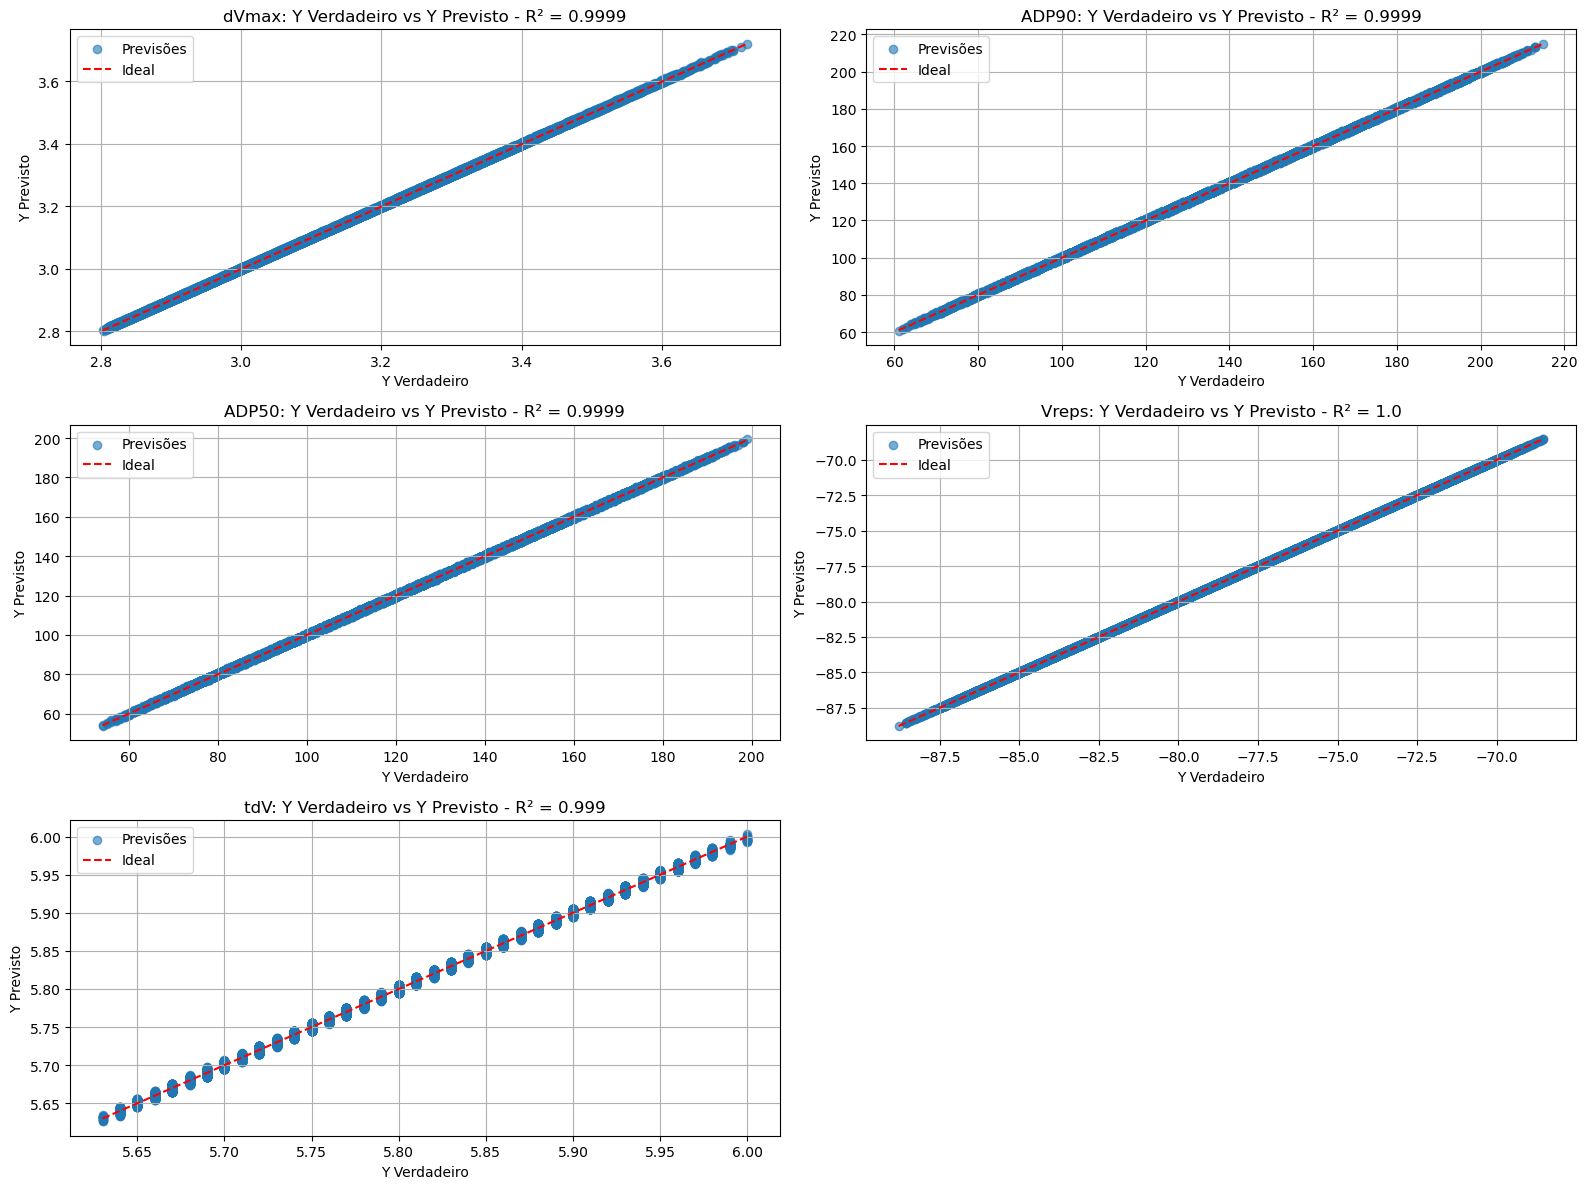

In [9]:
# Definir modelos
models = {
    # "Regressão Linear": LinearRegression(),
    "Processo Gaussiano": GaussianProcessRegressor(),
    # "Rede Neural": MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42),
}

# Treinar, avaliar e plotar para cada modelo
results = []
for name, model in models.items():
    
    model.fit(X_train, Y_train)

    predictions = model.predict(X_val)
    
    # Calcular MSE
    mse = mean_squared_error(Y_val, predictions)
    
    print(f"{name} MSE: {mse}")
    results.append({
        "Model": name,
        "MSE": mse
    })
    
    # Plotar Y verdadeiro vs Y previsto para cada QoI
    # Configurar layout do mega plot
    num_qois = len(Y.columns)
    rows = 3
    cols = 2
    fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
    axes = axes.flatten()

    for i, qoi in enumerate(Y.columns):
        ax = axes[i]
        ax.scatter(Y_val[qoi], predictions[:, Y.columns.get_loc(qoi)], alpha=0.6, label="Previsões")
        ax.plot([Y_val[qoi].min(), Y_val[qoi].max()], [Y_val[qoi].min(), Y_val[qoi].max()], 
                color="red", linestyle="--", label="Ideal")
        r2 = r2_score(Y_val[qoi], predictions[:, Y.columns.get_loc(qoi)])
        ax.set_title(f"{qoi}: Y Verdadeiro vs Y Previsto - R² = {round(r2,4)}")
        ax.set_xlabel("Y Verdadeiro")
        ax.set_ylabel("Y Previsto")
        ax.legend()
        ax.grid(True)

    # Desativar eixos vazios, caso o número de QoIs seja menor que o total de subplots
    for j in range(len(axes)):
        if j >= num_qois:
            axes[j].axis('off')

    plt.tight_layout()
    plt.savefig(f"{name}.jpg")
# Salvar os resultados em uma tabela
results_df = pd.DataFrame(results)
results_df.to_csv("resultados.csv", index=False)
print("Resultados salvos em 'resultados.csv'")
